In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

In [30]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("input"))

['sampleSubmission.csv', 'test1', 'train']


In [13]:
model = tf.keras.models.Sequential()
model.add(VGG16(include_top=False, input_shape=(128,128,3)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 16386     
Total params: 14,731,074
Trainable params: 14,731,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Flatten())

In [15]:
vgg = VGG16(include_top=False, input_shape=(128,128,3))

In [20]:
for layer in vgg.layers[:-4]:
    layer.trainable=False

In [26]:
[(x.input_spec, x.trainable) for x in vgg.layers]

[(None, False),
 (InputSpec(ndim=4, axes={-1: 3}), False),
 (InputSpec(ndim=4, axes={-1: 64}), False),
 (InputSpec(ndim=4), False),
 (InputSpec(ndim=4, axes={-1: 64}), False),
 (InputSpec(ndim=4, axes={-1: 128}), False),
 (InputSpec(ndim=4), False),
 (InputSpec(ndim=4, axes={-1: 128}), False),
 (InputSpec(ndim=4, axes={-1: 256}), False),
 (InputSpec(ndim=4, axes={-1: 256}), False),
 (InputSpec(ndim=4), False),
 (InputSpec(ndim=4, axes={-1: 256}), False),
 (InputSpec(ndim=4, axes={-1: 512}), False),
 (InputSpec(ndim=4, axes={-1: 512}), False),
 (InputSpec(ndim=4), False),
 (InputSpec(ndim=4, axes={-1: 512}), True),
 (InputSpec(ndim=4, axes={-1: 512}), True),
 (InputSpec(ndim=4, axes={-1: 512}), True),
 (InputSpec(ndim=4), True)]

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 16386     
Total params: 14,731,074
Trainable params: 14,731,074
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

Read in the data from current directory

In [31]:
filenames = os.listdir("input/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':                                                                                                             categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

Initialize image parameters

In [41]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

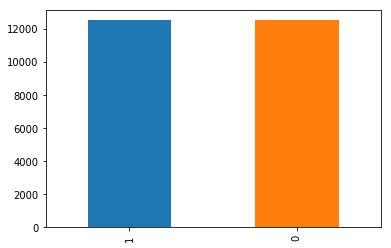

In [36]:
df['category'].value_counts().plot.bar()

Prepare train and test data

In [37]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})
train_df, validate_df = train_test_split(df, test_size=0.10, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=32

In [43]:
# # Traning Generator                                                                                                         
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,                                                                                                         width_shift_range=0.1,
    height_shift_range=0.1
)   

train_generator = train_datagen.flow_from_dataframe(
    train_df,                                                                                                                     "input/train/",                                                                                                               x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',    
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,                                                                                                                  "input/train/",                                                                                                               x_col='filename',                                                                                                             y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
epochs=2 #if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size
    #callbacks=callbacks
)

Epoch 1/2
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
